<a href="https://colab.research.google.com/github/tgwon/ai4ml/blob/main/Midterm_ai4ml_with_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mid-term exam on Machine Learning for AI

- Name:  
- ID Number:  

------------------------------------------
Copy this notebook to your google drive.  
Good luck! :)


In [ ]:
import pandas as pd


Downloading datasets

In [ ]:
!gdown --id 1uAgj40UQKq2bO_OBVEqr0lihB0p2DjTb

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1uAgj40UQKq2bO_OBVEqr0lihB0p2DjTb
To: /content/covid19_cases.csv
100% 3.06M/3.06M [00:00<00:00, 204MB/s]


In [ ]:
covid = pd.read_csv('covid19_cases.csv').assign(
    dateRep=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
)

In [ ]:
covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-09-19,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
1,2020-09-18,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155
2,2020-09-17,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
3,2020-09-16,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649
4,2020-09-15,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159


### Q1 From Covid19 data (covid), try to set 'dateRep' as index

In [ ]:
covid.head(2)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-09-19,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
1,2020-09-18,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155


In [ ]:
## Your codes here
covid.set_index('dateRep', inplace = True)

In [ ]:
covid.head(2)

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2020-09-19,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
2020-09-18,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155


### Q2 How many unique countries in the covid data?

In [ ]:
len(covid['countriesAndTerritories'].unique())

210

### Q3 Let's take subset of the covid data that meets following conditions:
 - Country names starting with A.
 - Months of May, June, and July on 2020


In [ ]:
newdata = covid[covid.countriesAndTerritories.str.startswith("A")]

In [ ]:
newdata = newdata.sort_index()['2020-05-1':'2020-07-31']

In [ ]:
newdata.head(3)

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2020-05-01,1,5,2020,2,0,Andorra,AD,AND,76177.0,Europe,82.702128
2020-05-01,1,5,2020,60,4,Austria,AT,AUT,8858775.0,Europe,11.017325
2020-05-01,1,5,2020,143,4,Argentina,AR,ARG,44780675.0,America,4.142412


### Q4 Change the processed data as wide format for countryterritoryCode for cases and deaths variables.

The result should look like below:
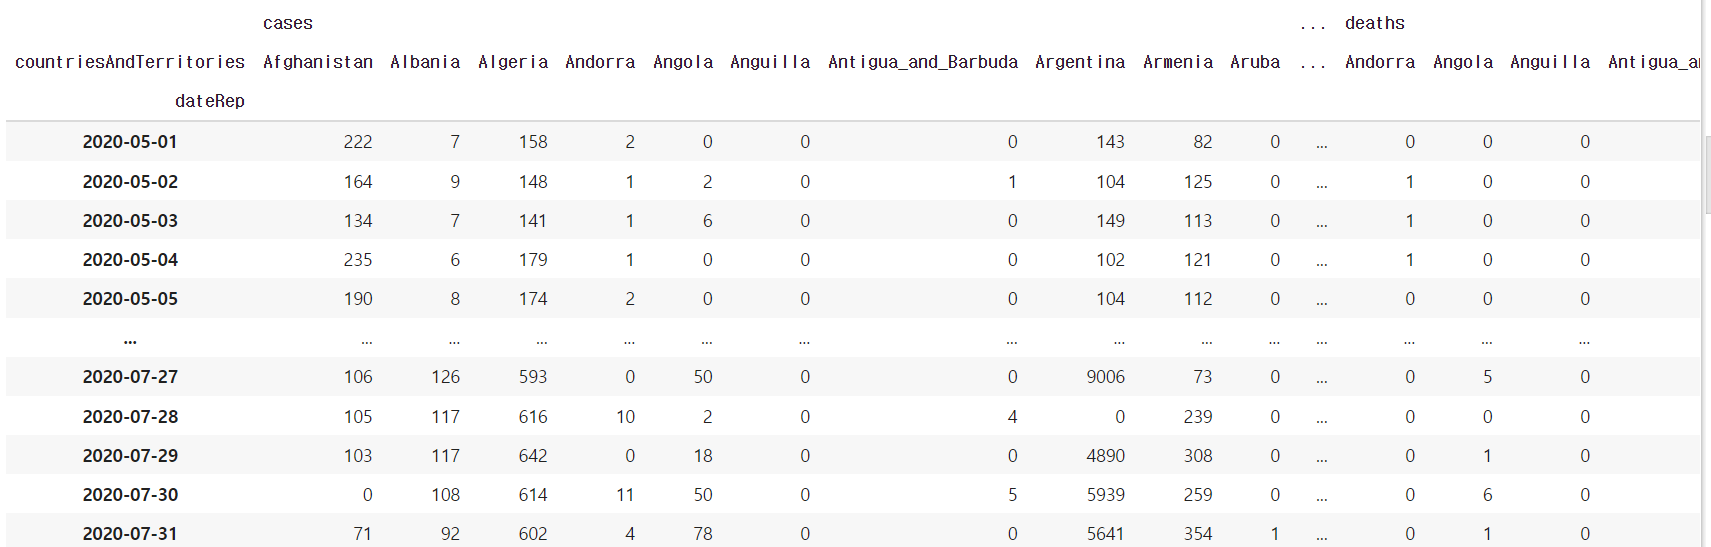

In case you couldn't sove Q3, You can start from 'newd' dataset below.

In [ ]:
!gdown --id 19nNmArPvrKzJ0EpU8NpE80kegkQqTDNd

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19nNmArPvrKzJ0EpU8NpE80kegkQqTDNd
To: /content/processed_Q3.csv
100% 84.3k/84.3k [00:00<00:00, 121MB/s]


In [ ]:
newd = pd.read_csv('processed_Q3.csv').assign(
        dateRep=lambda x: pd.to_datetime(x.dateRep) ).set_index('dateRep')

In [ ]:
## Your codes here
newd.reset_index().set_index(['dateRep','countriesAndTerritories'])[['cases', 'deaths']].unstack()

cases                                          \
countriesAndTerritories Afghanistan Albania Algeria Andorra Angola Anguilla   
dateRep                                                                       
2020-05-01                      222       7     158       2      0        0   
2020-05-02                      164       9     148       1      2        0   
2020-05-03                      134       7     141       1      6        0   
2020-05-04                      235       6     179       1      0        0   
2020-05-05                      190       8     174       2      0        0   
...                             ...     ...     ...     ...    ...      ...   
2020-07-27                      106     126     593       0     50        0   
2020-07-28                      105     117     616      10      2        0   
2020-07-29                      103     117     642       0     18        0   
2020-07-30                        0     108     614      11     50        0   
2020-07-31                       71      92     602       4     78        0   

                                                                     ...  \
countriesAndTerritories Antigua_and_Barbuda Argentina Armenia Aruba  ...   
dateRep                                                              ...   
2020-05-01                                0       143      82     0  ...   
2020-05-02                                1       104     125     0  ...   
2020-05-03                                0       149     113     0  ...   
2020-05-04                                0       102     121     0  ...   
2020-05-05                                0       104     112     0  ...   
...                                     ...       ...     ...   ...  ...   
2020-07-27                                0      9006      73     0  ...   
2020-07-28                                4         0     239     0  ...   
2020-07-29                                0      4890     308     0  ...   
2020-07-30                                5      5939     259     0  ...   
2020-07-31                                0      5641     354     1  ...   

                         deaths                                                \
countriesAndTerritories Andorra Angola Anguilla Antigua_and_Barbuda Argentina   
dateRep                                                                         
2020-05-01                    0      0        0                   0         4   
2020-05-02                    1      0        0                   0         7   
2020-05-03                    1      0        0                   0        12   
2020-05-04                    1      0        0                   0         9   
2020-05-05                    0      0        0                   0        14   
...                         ...    ...      ...                 ...       ...   
2020-07-27                    0      5        0                   0        92   
2020-07-28                    0      0        0                   0        17   
2020-07-29                    0      1        0                   0       126   
2020-07-30                    0      6        0                   0       118   
2020-07-31                    0      1        0                   0       111   

                                                                    
countriesAndTerritories Armenia Aruba Australia Austria Azerbaijan  
dateRep                                                             
2020-05-01                    1     0         2       4          1  
2020-05-02                    0     0         1       5          1  
2020-05-03                    2     0         0       7          0  
2020-05-04                    4     0         2       2          0  
2020-05-05                    1     0         0       2          1  
...                         ...   ...       ...     ...        ...  
2020-07-27                    6     0        10       0          9  
2020-07-28                    8  

### Q5 Which country has the highest cumulative number of confirmed cases among countries with country names beginning with A? What is that cumulative number of the country?



In case you couldn't sove Q4, You can start from 'newd2' dataset below

In [ ]:
!gdown --id 1VHsC88bw46y8kMOKA0HsCMwhOPGyB4GV

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VHsC88bw46y8kMOKA0HsCMwhOPGyB4GV
To: /content/processed_covid.csv
100% 4.79k/4.79k [00:00<00:00, 17.8MB/s]


In [ ]:
newd2 = pd.read_csv('processed_covid.csv').assign(
        dateRep=lambda x: pd.to_datetime(x.dateRep) ).set_index('dateRep')

In [ ]:
#newd2 = newdata.reset_index().set_index(['dateRep','countriesAndTerritories'])[['cases', 'deaths']].unstack()

In [ ]:
### Your code here:
newd2.apply(lambda x: x.expanding().sum())

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan
dateRep,,,,,,,,,,,,,
2020-05-01,222.0,7.0,158.0,2.0,0.0,0.0,0.0,143.0,82.0,0.0,16.0,60.0,38.0
2020-05-02,386.0,16.0,306.0,3.0,2.0,0.0,1.0,247.0,207.0,0.0,21.0,94.0,88.0
2020-05-03,520.0,23.0,447.0,4.0,8.0,0.0,1.0,396.0,320.0,0.0,37.0,106.0,128.0
2020-05-04,755.0,29.0,626.0,5.0,8.0,0.0,1.0,498.0,441.0,0.0,55.0,174.0,166.0
2020-05-05,945.0,37.0,800.0,7.0,8.0,0.0,1.0,602.0,553.0,0.0,79.0,205.0,218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,34314.0,3997.0,23509.0,154.0,903.0,0.0,58.0,158241.0,35324.0,19.0,7657.0,5122.0,28284.0
2020-07-28,34419.0,4114.0,24125.0,164.0,905.0,0.0,62.0,158241.0,35563.0,19.0,8189.0,5186.0,28680.0
2020-07-29,34522.0,4231.0,24767.0,164.0,923.0,0.0,62.0,163131.0,35871.0,19.0,8558.0,5318.0,29092.0


Argentina, 174711

### Q6 Make a line plot for following four countries, 'Argentina', 'Afghanistan', 'Armenia', and 'Algeria'. You can start from newd2 data used from Q5.

The result should look like below:
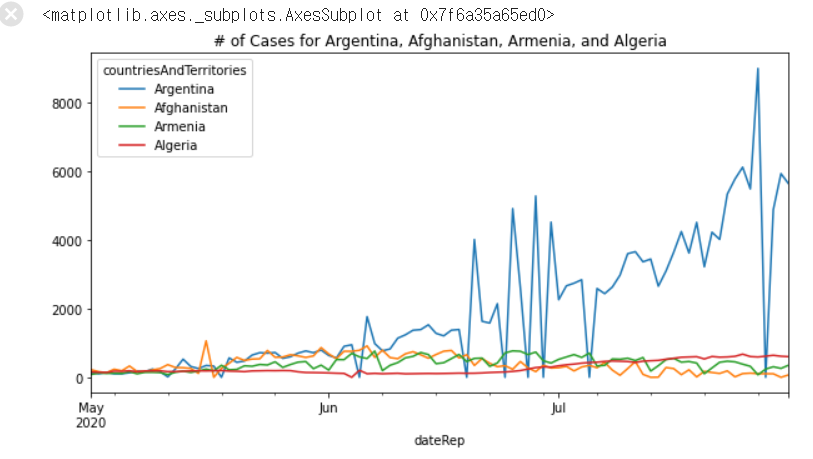

<Axes: title={'center': '# of Cases for Argentina, Afghanistan, Armenia, and Algeria'}, xlabel='dateRep'>

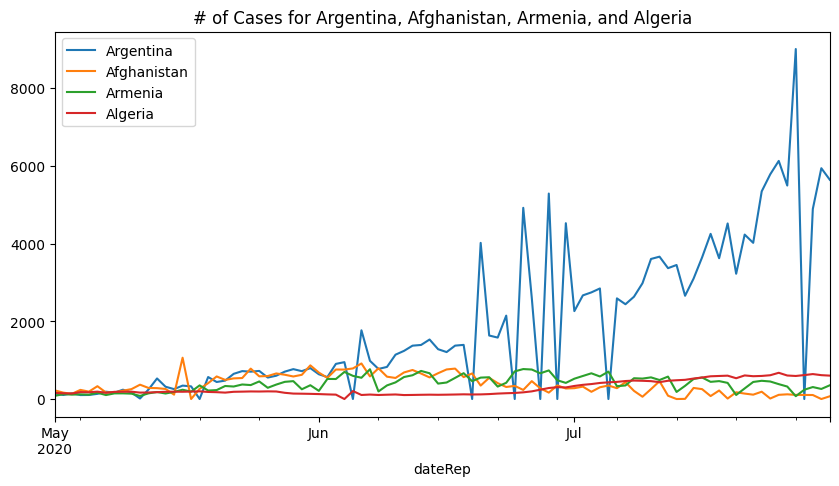

In [ ]:
newd2.plot(kind='line',
    y=['Argentina', 'Afghanistan', 'Armenia', 'Algeria'],
    figsize=(10, 5),
#    legend=False,
    title='# of Cases for Argentina, Afghanistan, Armenia, and Algeria')

### Q7 Use rolling 7 days median for cases variable to smooth the previous visualization

The result should look like below:
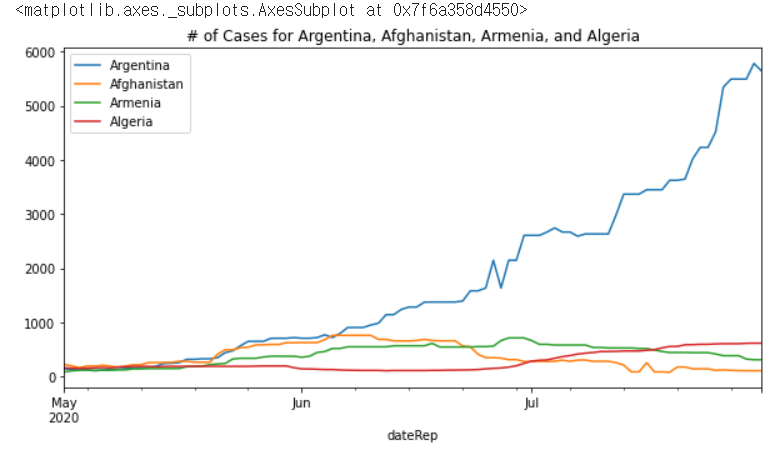

In [ ]:
newd2.apply(lambda x: x.rolling('7D').median())

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan
dateRep,,,,,,,,,,,,,
2020-05-01,222.0,7.0,158.0,2.0,0.0,0.0,0.0,143.0,82.0,0.0,16.0,60.0,38.0
2020-05-02,193.0,8.0,153.0,1.5,1.0,0.0,0.5,123.5,103.5,0.0,10.5,47.0,44.0
2020-05-03,164.0,7.0,148.0,1.0,2.0,0.0,0.0,143.0,113.0,0.0,16.0,34.0,40.0
2020-05-04,193.0,7.0,153.0,1.0,1.0,0.0,0.0,123.5,117.0,0.0,16.0,47.0,39.0
2020-05-05,190.0,7.0,158.0,1.0,0.0,0.0,0.0,104.0,113.0,0.0,16.0,34.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,112.0,104.0,605.0,0.0,33.0,0.0,0.0,5493.0,383.0,1.0,359.0,137.0,352.0
2020-07-28,108.0,108.0,605.0,0.0,30.0,0.0,0.0,5493.0,383.0,0.0,410.0,137.0,352.0
2020-07-29,106.0,108.0,612.0,0.0,30.0,0.0,0.0,5493.0,321.0,0.0,410.0,132.0,391.0


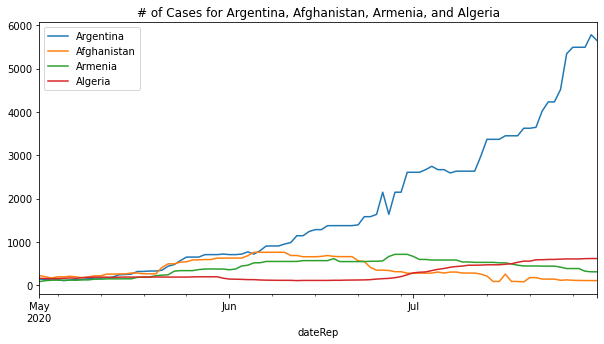

In [ ]:
newd2.apply(lambda x: x.rolling('7D').median()).plot(kind='line',
    y=['Argentina', 'Afghanistan', 'Armenia', 'Algeria'],
    figsize=(10, 5),
#    legend=False,
    title='# of Cases for Argentina, Afghanistan, Armenia, and Algeria')

### Q8 Read the following data preprocessed from Q3 ('newd'). Do the followings:
 - Select 'cases',	'deaths',	'countriesAndTerritories' variables.
 - Calculate total number of cases for each day (Hint: you can use groupby)
 - Add daily total cases variable to the original data, 'newd' having three variables ('cases',	'deaths',	'countriesAndTerritories') (Hint: you can use transform() )

 The result should look like below:
 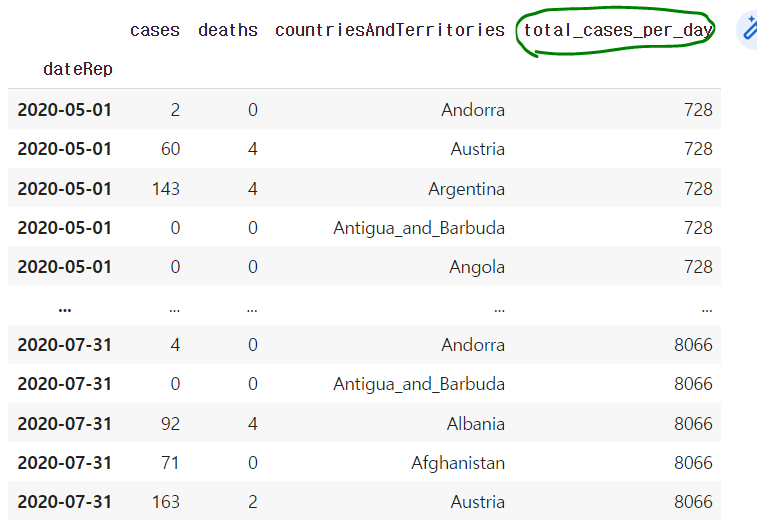

In [ ]:
!gdown --id 19nNmArPvrKzJ0EpU8NpE80kegkQqTDNd

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19nNmArPvrKzJ0EpU8NpE80kegkQqTDNd
To: /content/processed_Q3.csv
100% 84.3k/84.3k [00:00<00:00, 117MB/s]


In [ ]:
newd3 = pd.read_csv('processed_Q3.csv').assign(
        dateRep=lambda x: pd.to_datetime(x.dateRep) ).set_index('dateRep')

In [ ]:
newd3.groupby(level=0).cases.sum()

dateRep
2020-05-01      728
2020-05-02      643
2020-05-03      619
2020-05-04      768
2020-05-05      697
              ...  
2020-07-27    10961
2020-07-28     2085
2020-07-29     6991
2020-07-30     7791
2020-07-31     8066
Name: cases, Length: 92, dtype: int64

In [ ]:
newd3[[ 'cases', 'deaths', 'countriesAndTerritories' ]].assign( total_cases_per_day = newd3.groupby(level=0).cases.transform('sum'))


,cases,deaths,countriesAndTerritories,total_cases_per_day
dateRep,,,,
2020-05-01,2,0,Andorra,728
2020-05-01,60,4,Austria,728
2020-05-01,143,4,Argentina,728
2020-05-01,0,0,Antigua_and_Barbuda,728
2020-05-01,0,0,Angola,728
...,...,...,...,...
2020-07-31,4,0,Andorra,8066
2020-07-31,0,0,Antigua_and_Barbuda,8066
2020-07-31,92,4,Albania,8066


### Q9 Make a stacked bar plot:
 - Start from 'newd2' dataset below.
 - Take subset of July in 2020.
 - Create stacked bar plot using following contries: 'Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan'.
 - Draw stacked bar plot of number of cases for each day. We would like to see how many cases for the above contries.

 The result should look like below:
 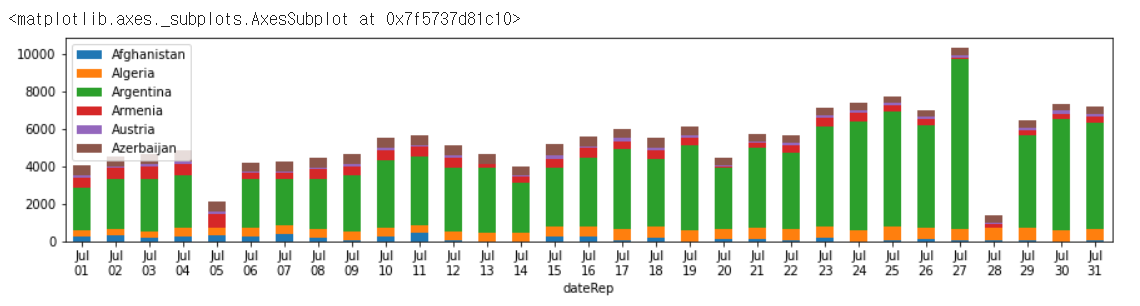

In [ ]:
!gdown --id 1VHsC88bw46y8kMOKA0HsCMwhOPGyB4GV

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VHsC88bw46y8kMOKA0HsCMwhOPGyB4GV
To: /content/processed_covid.csv
100% 4.79k/4.79k [00:00<00:00, 15.3MB/s]


In [ ]:
newd2 = pd.read_csv('processed_covid.csv').assign(
        dateRep=lambda x: pd.to_datetime(x.dateRep) ).set_index('dateRep')

In [ ]:
newdd = newd2['2020-07-01':'2020-07-31']

In [ ]:
# format the datetimes in the index for the x-axis
newdd.index = newdd.index.strftime('%b\n%d')

<Axes: xlabel='dateRep'>

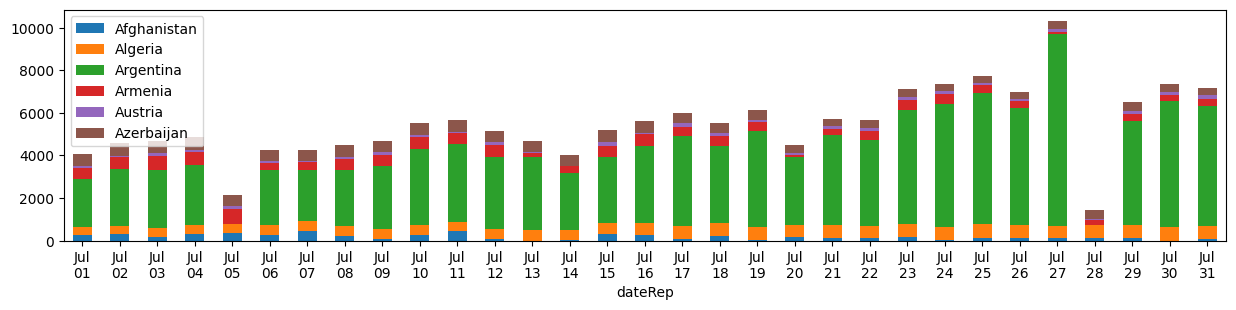

In [ ]:
newdd.plot.bar(y=['Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan'], figsize=(15, 3), rot=0, stacked = True)

### Q10 From covid19 data ('covid') do the followings
 - Take subset of year 2020
 - Calculate number of cases for each month for each continent ('continentExp')
 - Visualize this information using barplot


 The result should look like below:
 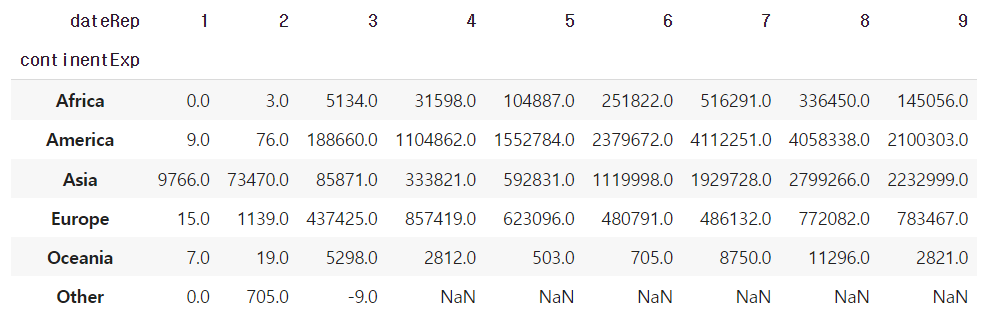

Barplot:


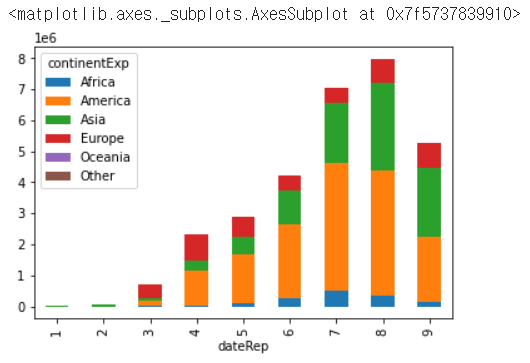

In [ ]:
newcovid = covid['2020-01-01':'2020-12-31']

In [ ]:
newcovid.pivot_table( index = 'continentExp', columns = newcovid.index.month, values = 'cases', aggfunc = 'sum'  )

dateRep,1,2,3,4,5,6,7,8,9
continentExp,,,,,,,,,
Africa,0.0,3.0,5134.0,31598.0,104887.0,251822.0,516291.0,336450.0,145056.0
America,9.0,76.0,188660.0,1104862.0,1552784.0,2379672.0,4112251.0,4058338.0,2100303.0
Asia,9766.0,73470.0,85871.0,333821.0,592831.0,1119998.0,1929728.0,2799266.0,2232999.0
Europe,15.0,1139.0,437425.0,857419.0,623096.0,480791.0,486132.0,772082.0,783467.0
Oceania,7.0,19.0,5298.0,2812.0,503.0,705.0,8750.0,11296.0,2821.0
Other,0.0,705.0,-9.0,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='dateRep'>

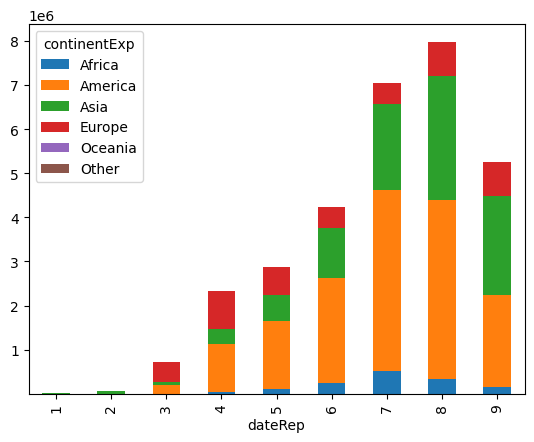

In [ ]:
newcovid.pivot_table( index = 'continentExp', columns = newcovid.index.month, values = 'cases', aggfunc = 'sum'  ).T.plot(kind = 'bar', stacked = True)